# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

## Thông tin đồ án

+ Chủ đề: **Tìm hiểu về giá thuê chung cư ở thành phố Hồ Chí Minh**
+ Github: [p4ds-final](https://github.com/vanhung4499/p4ds-final)

### Thông tin nhóm


| MSSV    | Họ và tên       |
|---------|-----------------|
| 1712222 | Nguyễn Văn Hùng |

## Môi trường làm việc

Môi trường làm việc:
+ OS: macOS
+ IDE: Pycharm
+ Sử dụng mội trường `min_ds-evn` như các bài lab

In [2]:
import sys
sys.executable

'/usr/local/anaconda3/envs/min_ds-env/bin/python'

## Import and constant

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
DATA_CSV = './data/hcm-apartment-rent-data.csv'
plt.style.use("fivethirtyeight")

## 1. Thu thập dữ liệu

### 1.1. Chủ đề, mục đích và nguồn của dữ liệu?

- **Chủ đề**: Giá thuê chung cư ở thành phố Hồ Chí Minh

- **Mục đích**: Dựa vào nhu cầu sử dụng và khả năng tài chính, người dùng có thể khai thác các thông tin có ích trong tập dữ liệu để tìm được căn nhà như mong muốn của mình tại ở chung cư Hồ Chí Minh

- **Nguồn**: Dữ liệu được crawl từ website mua giới [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh) - website môi giới phổ biến trong lĩnh vực bất động sản ở Việt Nam.

### 1.2. Người ta có cho phép sử dụng dữ liệu như thế này hay không?

- Sau khi tìm hiểu các điều khoản của website, chotot không có quy định cụ thể về việc sử dụng dữ liệu được mua bán được công khai cho người dùng ở website. 
- Tuy nhiên, tập dữ liệu là các thông tin được chotot công bố cho toàn bộ người dùng (public api), project này chỉ dành cho mục đích học tập, không có mục đích thương mại, do đó có chúng ta có thể sử dụng tập dữ liệu trong project này.

### 1.3. Thu thập dữ liệu này như thế nào?

+ Dữ liệu được crawl từ toàn bộ trang web [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh), bao gồm toàn bộ 1000 trang nhỏ, thu về gần 20000 mẫu dữ liệu.
+ Chi tiết về cách crawl được mô tả ở file notebook [`Crawl-data.ipynb`](./Crawl-data.ipynb)

## 2. Khám phá dữ liệu

### 2.1. Đọc dữ liệu

In [5]:
apartment_df = pd.read_csv(DATA_CSV)
apartment_df.head()

,ad_id,list_id,list_time,subject,body,price,price_string,size,rooms,toilets,...,region_name,ward_name,street_name,deposit,zero_deposit,longitude,latitude,owner,company_ad,apartment_type
0,139905225,101449743,1669427357000,"Căn hộ CMT8 Q10, Cửa sổ, Máy giặt riêng, Gác","Căn hộ Cách Mạng Tháng 8 Q10, Cửa sổ, Máy giặt...",9000000.0,9 triệu/tháng,30.0,1,1.0,...,Tp Hồ Chí Minh,Phường 13,Hẻm 499 Cách Mạng Tháng 8,0,False,106.67245,10.78176,False,True,Căn hộ dịch vụ
1,140064167,101580825,1669783016000,Căn Hộ 1PN _ Kcx Tân Thuận chợ UFM sát Quận 4🌈,⭐️Sắp hết tháng rồi khách đã tìm được phòng ch...,5700000.0,"5,7 triệu/tháng",37.0,1,1.0,...,Tp Hồ Chí Minh,Phường Bình Thuận,Đường Lý Phục Man,0,False,106.72563,10.74310,False,True,Căn hộ dịch vụ
2,139905234,101449753,1669427371000,KHAI TRƯƠNG CĂN HỘ BANCOL FULL NỘI THẤT,Cho thuê căn hộ\n_Vị trí : đường Thạch Lam p.p...,4500000.0,"4,5 triệu/tháng",35.0,1,1.0,...,Tp Hồ Chí Minh,Phường Phú Thạnh,Đường Thạch Lam,0,False,106.62711,10.77815,False,True,Căn hộ dịch vụ
3,140064185,101580839,1669783034000,Căn hộ ban công lớn cực Chill_Ngay Điện Biên Phủ,"📣📣 HỆ THỐNG CĂN HỘ STUDIO, 1PN CÒN TRỐNG, FULL...",11000000.0,11 triệu/tháng,45.0,1,1.0,...,Tp Hồ Chí Minh,Phường 17,Hẻm 372 Điện Biên Phủ,0,False,106.70816,10.79913,False,True,Chung cư
4,140064089,101580840,1669783039000,Cho thuê CHDV ngay Bình Thạnh gần Thảo Cầm Viên,𝗧𝗿𝗼̂́𝗻𝗴 𝘀𝗮̆̃𝗻 𝗖𝗛𝗗𝗩 𝗦𝘁𝘂𝗱𝗶𝗼 𝗼̛̉ 𝗱𝘂̛𝗼̛̣𝗰 𝗹𝗶𝗲̂̀𝗻 𝗴...,5800000.0,"5,8 triệu/tháng",30.0,1,1.0,...,Tp Hồ Chí Minh,Phường 19,Đường Nguyễn Ngọc Phương,1,False,106.70789,10.79040,False,True,Căn hộ dịch vụ


### 2.2. Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [6]:
apartment_df.shape

(19911, 21)

Dữ liệu gồm 19996 dòng, mỗi dòng gồm 20 cột.

### 2.3. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng là thông tin cho thuê của một căn hộ như giá thuê, diện tích, số phòng, số nhà vệ sinh, địa chỉ, ...
- Do số lượng các dòng quá lớn nên không thể chắc chắn được có các dòng với ý nghĩa khác nhau. Tuy nhiên:
  - Một số cột thông tin có thể chắc chắn không xảy ra vấn đề đó do dữ liệu được đảm bảo đồng nhất khi người dùng nhập như: rooms, toilets, body, street_name, ward_name, area_name, region_name, ...
   - Một số thông tin do người dùng tự nhập không đảm bảo được tính đồng nhất như: subject, body, ...

### 2.4. Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột:

| Column         | Description                                |
|----------------|--------------------------------------------|
| ad_id          | id của tin (để phân biệt)                  |
| list_id        | id trong danh sách ads (dùng để phân biệt) |
| list_time      | Thời gian đăng tin                         |
| price          | Giá thuê (VND)                             |
| price_string   | Giá thuê (triệu / tháng) cho dễ nhìn       |
| size           | Diện tích (m2)                             |
| rooms          | Số phòng                                   |
| toilets        | Số nhà vệ sinh                             |
| body           | Mô tả                                      |
| street_name    | Đường                                      |
| ward_name      | Phường                                     |
| area_name      | Quận huyện                                 |
| region_name    | Thành phố, tỉnh                            |
| zero_deposit   | Có cần tiền cọc không?                     |
| deposit        | Tiền cọc                                   |
| longitude      | Kinh độ                                    |
| latitude       | Vĩ độ                                      |
| owner          | Có phải chủ nhà không?                     |
| company_ad     | Tin của các nhân hay công ty               |
| apartment_type | Kiểu căn hộ / chung cư                     |

### 2.4. Kiểm tra dữ liệu có bị trùng lặp không?

In [7]:
apartment_df.duplicated().sum()

0

Dữ liệu thu thập được không bị trùng lặp

### 2.5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19911 entries, 0 to 19910
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_id           19911 non-null  int64  
 1   list_id         19911 non-null  int64  
 2   list_time       19911 non-null  int64  
 3   subject         19911 non-null  object 
 4   body            19911 non-null  object 
 5   price           19897 non-null  float64
 6   price_string    19897 non-null  object 
 7   size            19910 non-null  float64
 8   rooms           19911 non-null  int64  
 9   toilets         19904 non-null  float64
 10  area_name       19903 non-null  object 
 11  region_name     19911 non-null  object 
 12  ward_name       19899 non-null  object 
 13  street_name     19696 non-null  object 
 14  deposit         19911 non-null  int64  
 15  zero_deposit    19911 non-null  bool   
 16  longitude       19904 non-null  float64
 17  latitude        19904 non-null 

- Nhận thấy một số vấn đè như sau:
  + Cột `toilets`, `price` là số nhà vệ sinh nên có kiểu dữ liệu `int64`
  + Cột `list_time` là thời gian đăng tin nên có kiểu `datetime`
  + Cột `ad_id`, `list_id`, `company_ad`, sẽ không còn cần thiết
  + Cột `size`, `price`, `toilets`, `area_name` có bị thiếu nên ta sẽ loại bỏ những dòng thiếu này

In [9]:
# convert timestamp in milisecond to datetime
apartment_df['list_time'] = pd.to_datetime(apartment_df['list_time'], unit='ms')

In [10]:
# drop missing value
apartment_df = apartment_df.dropna()
# drop not used column
apartment_df = apartment_df.drop(['ad_id', 'list_id', 'company_ad'], axis=1)
apartment_df.shape

(19676, 18)

Sau khi loại bỏ các cột không sử dụng và các dòng rỗng, tập dữ liệu còn lại 19873 dòng, mỗi dòng gồm 18 cột.

In [11]:
# convert float64 to int64
apartment_df['toilets'] = apartment_df['toilets'].apply(np.int64)
apartment_df['price'] = apartment_df['price'].apply(np.int64)

In [12]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19676 entries, 0 to 19910
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   list_time       19676 non-null  datetime64[ns]
 1   subject         19676 non-null  object        
 2   body            19676 non-null  object        
 3   price           19676 non-null  int64         
 4   price_string    19676 non-null  object        
 5   size            19676 non-null  float64       
 6   rooms           19676 non-null  int64         
 7   toilets         19676 non-null  int64         
 8   area_name       19676 non-null  object        
 9   region_name     19676 non-null  object        
 10  ward_name       19676 non-null  object        
 11  street_name     19676 non-null  object        
 12  deposit         19676 non-null  int64         
 13  zero_deposit    19676 non-null  bool          
 14  longitude       19676 non-null  float64       
 15  la

### 2.6. Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [13]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

numeric_cols = ['price', 'size', 'rooms', 'toilets', 'deposit']
apartment_df[numeric_cols].describe()

,price,size,rooms,toilets,deposit
count,"19,676","19,676","19,676","19,676","19,676"
mean,"27,179,492",64,2,1,"10,356,813"
std,"622,224,013","1,070",1,1,"319,744,251"
min,"500,000",2,1,1,0
25%,"6,000,000",35,1,1,0
50%,"8,000,000",51,1,1,0
75%,"12,500,000",72,2,2,"7,500,000"
max,"70,000,000,000","150,000",11,7,"38,000,000,000"


- Dựa vào giá trị min và max của `price`, `size`, `deposit` rút ra một số vấn đề:
   - Các căn hộ chung cư có diện tích 2 $m^2$ là không thực tế để có thể sinh hoạt $\Rightarrow$  có thể là tin rác.
   - Các căn hộ chung cư có diện tích 150000 $m^2$ hoặc giá thuê 70 tỷ/tháng hoặc cọc 38 tỷ $\Rightarrow$ có thể là bán là đất nền nhưng đăng nhầm qua cho thuê chung cư.


- Các cột còn lại phân bố bình thường:
   - `rooms` có giá trị từ 1 -> 11
   - `toilets` có giá trị từ 1 -> 7

- Vì mục tiêu tìm hiểu giá chung cư phù hợp với thực tế sử dụng, ta sẽ loại bỏ đi những căn hộ có:
    - Giá dưới 500 nghìn đồng
    - Giá trên 100 triệu đồng
    - Diện tích dưới 10 $m^2$

In [14]:
index = apartment_df[(apartment_df['price'] < 500000) | (apartment_df['price'] > 100000000) | (apartment_df['size'] < 10)].index
apartment_df.drop(index, inplace=True)

apartment_df.shape

(19612, 18)

### 2.7. Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

#### Cột **region_name**

In [15]:
apartment_df['region_name'].value_counts()

Tp Hồ Chí Minh    19612
Name: region_name, dtype: int64

Do ta chỉ xem xét ở TP HCM nên cột này chỉ có duy nhất một giá trị, loại bỏ cột này

In [16]:
apartment_df = apartment_df.drop(['region_name'], axis=1)

#### Cột **area_name**

<AxesSubplot:title={'center':'Distribution of area_name'}>

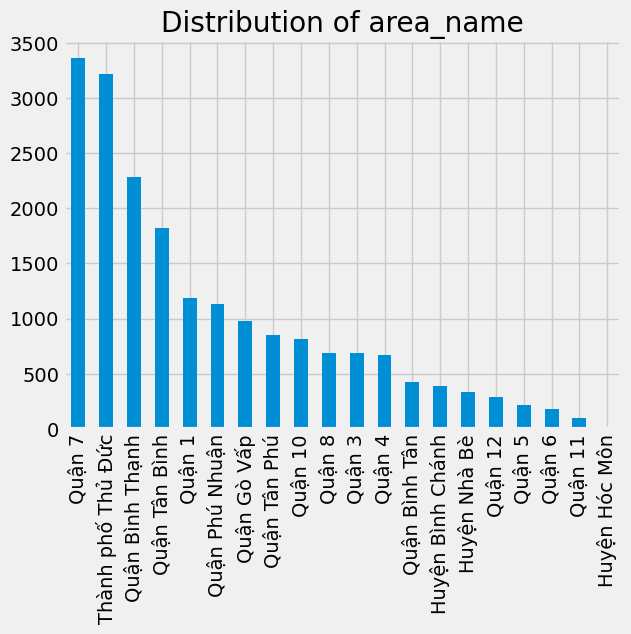

In [17]:
area = apartment_df['area_name'].value_counts()
area.plot.bar(title='Distribution of area_name')

Trên đây là phân bố căn hộ cho thuê theo quận sắp xếp theo số lượn giảm dần:
+ Nhiều nhất là quận 7 với hơn 3 nghìn tin cho thuê, tiếp theo là thành phố Đức (quận Thủ Đức + quận 9 + quận 2) diện tích rất lớn nhưng vẫn ít phòng cho thuê hơn quận 7
+ Huyện Hóc Môn xếp bét bảng với chỉ 4 tin, do các huyện này ở xa trung tâm nên nhu cầu thuê nhà ít.

#### Cột **owner**

In [18]:
apartment_df['owner'].value_counts()

False    19612
Name: owner, dtype: int64

Tất cả đều là False, có nghĩa là không có chủ nhà nào đăng tin cho thuê, tất cả đều là môi giới, nếu thuê thì sẽ khó thương lượng giảm giá với chủ nhà đuợc vì họ thường phải trả cho môi giới một khoản phí. Do đó ta sẽ loại bỏ cột này.

In [19]:
apartment_df = apartment_df.drop(['owner'], axis=1)

#### Cột **apartment_type**

(18605, 16)


<AxesSubplot:title={'center':'Number of apartments per type'}>

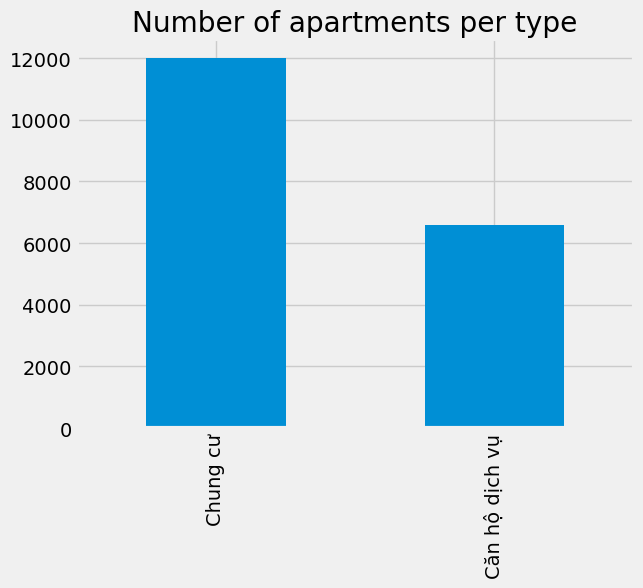

In [20]:
apartment_df = apartment_df[(apartment_df['apartment_type'] == 'Chung cư') | (apartment_df['apartment_type'] == 'Căn hộ dịch vụ')]

print(apartment_df.shape)

type = apartment_df['apartment_type'].value_counts()

type.plot.bar(title="Number of apartments per type")

+ Sau khi lọc, chỉ còn 18605 dòng
+ Đa số là căn hộ chung cư, gần gấp đôi số căn hộ dịch vụ

#### Cột **zero_deposit**

In [21]:
apartment_df['zero_deposit'].value_counts()

False    18602
True         3
Name: zero_deposit, dtype: int64

Gần như chủ nhà sẽ yêu cầu tiền cọc, chủ có 4 tin không cần cọc nhưng mà khả năng cũng là do quên điền lúc tạo tin. Ta sẽ bỏ qua cột này luôn!

In [22]:
apartment_df = apartment_df.drop(['zero_deposit'], axis=1)

#### Cột **list_time**

In [23]:
pd.to_datetime(apartment_df['list_time']).dt.date.value_counts()

2022-12-02    1642
2022-12-03    1579
2022-12-01    1442
2022-11-23    1295
2022-11-30    1287
2022-11-22    1284
2022-11-28    1275
2022-11-29    1261
2022-11-24    1255
2022-11-25    1229
2022-11-21    1132
2022-11-26    1067
2022-11-19     956
2022-11-20     843
2022-11-27     764
2022-11-18     294
Name: list_time, dtype: int64

Các tin được đăng từ 18/11 tới 3/12, trong khoảng 2 tuần, nên có thể coi dữ liệu là mới, tính ở thời điểm phân tích là ngày 3/12. Ta cũng có thể bỏ cột này luôn vì nó không có quá nhiều ý nghĩa khi gần nhau

In [24]:
apartment_df = apartment_df.drop(['list_time'], axis=1)

## 3. Đặt ra các câu hỏi?

### Câu 1. Giá thuê căn hộ ở các quận chênh lệch như thế nào?

**Ý nghĩa**: Có cái nhìn tổng quát về giá thuê nhà tại các quận, giá theo diện tích, theo số phòng, theo loại hình để có thể xem xét và đưa ra quyết định nên thuê ở đâu, các đặc điểm của căn hộ ra sao.

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

**Ý nghĩa**: Để hiểu thêm về sự tương quan giữa giá thuê với các yếu tố khác như diện tích, số phòng, số nhà vệ sinh, vị trí, ...

### Câu 3. Tìm một căn hộ phù hợp để thuê theo một số tiêu chí?

**Ý nghĩa**: thực tế chỉ là để tham khảo chọn phòng để thuê

## 4. Phân tích dữ liệu và trả lời từng câu hỏi

### Câu 1: Giá thuê căn hộ ở các quận chênh lệch như thế nào?

Ta sẽ tổng hợp lại dữ liệu theo các quận, rồi tìm ra min-max và avg price theo số phòng, min-max theo size

In [25]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

res = apartment_df.groupby(['area_name']).agg({ 'price': ['min', 'max', 'mean'] })


In [26]:
print('Mean, min, and max price grouped by area_name, order ascending by mean')
print(res.sort_values(by=('price', 'mean'),ascending=False))

Mean, min, and max price grouped by area_name, order ascending by mean
                     price                      
                       min        max       mean
area_name                                       
Quận 4              850000   61888888 15,337,403
Quận 1              500000   87500000 12,949,173
Huyện Nhà Bè        800000   25000000 12,459,208
Thành phố Thủ Đức  1400000   99200000 12,310,912
Quận 10            3000000   55000000 11,968,211
Quận 7             1400000  100000000 10,730,773
Quận 11            3500000   21000000 10,505,376
Quận Phú Nhuận     3500000   45000000 10,333,857
Quận 5             1875000   33000000 10,179,881
Quận 6             1000000   16000000 10,118,639
Quận Bình Thạnh     846800  100000000  9,899,749
Quận Tân Phú        850000   29000000  9,048,310
Huyện Bình Chánh   1000000   20000000  9,030,544
Quận 8             1500000   16000000  8,901,610
Quận 3             3600000   83000000  8,893,239
Quận Tân Bình      2600000   45000000  8,275,02

**Nhận xét**: Quận 1 có giá thuê chung cư trung bình cao nhất (15,337,403), trong khi đó huyện Hóc Môn có giá thuê chung cư trung bình thấp nhất (4,875,000), chênh lệch hơn 10 triệu đồng

In [27]:
print('Mean, min, and max price grouped by area_name, order ascending by min')
print(res.sort_values(by=('price', 'min'),ascending=False))

Mean, min, and max price grouped by area_name, order ascending by min
                     price                      
                       min        max       mean
area_name                                       
Huyện Hóc Môn      4500000    5000000  4,875,000
Quận 3             3600000   83000000  8,893,239
Quận Phú Nhuận     3500000   45000000 10,333,857
Quận 11            3500000   21000000 10,505,376
Quận 10            3000000   55000000 11,968,211
Quận Tân Bình      2600000   45000000  8,275,027
Quận Gò Vấp        2000000   18000000  6,319,594
Quận Bình Tân      2000000   41000000  8,059,236
Quận 5             1875000   33000000 10,179,881
Quận 8             1500000   16000000  8,901,610
Thành phố Thủ Đức  1400000   99200000 12,310,912
Quận 7             1400000  100000000 10,730,773
Huyện Bình Chánh   1000000   20000000  9,030,544
Quận 6             1000000   16000000 10,118,639
Quận 4              850000   61888888 15,337,403
Quận Tân Phú        850000   29000000  9,048,310

**Nhận xét**: Huyện Hóc Môn có giá thuê chung cư thấp nhất cao nhất (4500000), trong khi đó Quận 1 có giá thuê chung cư thấp nhất thấp nhất (500000), chênh lệch 4 triệu đồng

In [28]:
print('Mean, min, and max price grouped by area_name, order ascending by max')
print(res.sort_values(by=('price', 'max'),ascending=False))

Mean, min, and max price grouped by area_name, order ascending by max
                     price                      
                       min        max       mean
area_name                                       
Quận 7             1400000  100000000 10,730,773
Quận Bình Thạnh     846800  100000000  9,899,749
Thành phố Thủ Đức  1400000   99200000 12,310,912
Quận 1              500000   87500000 12,949,173
Quận 3             3600000   83000000  8,893,239
Quận 4              850000   61888888 15,337,403
Quận 10            3000000   55000000 11,968,211
Quận Phú Nhuận     3500000   45000000 10,333,857
Quận Tân Bình      2600000   45000000  8,275,027
Quận Bình Tân      2000000   41000000  8,059,236
Quận 5             1875000   33000000 10,179,881
Quận Tân Phú        850000   29000000  9,048,310
Quận 12             700000   27000000  7,368,990
Huyện Nhà Bè        800000   25000000 12,459,208
Quận 11            3500000   21000000 10,505,376
Huyện Bình Chánh   1000000   20000000  9,030,544

**Nhận xét**: Quận 7 có giá thuê chung cư cao nhất cao nhất (100000000), trong khi đó huyện Hóc Môn có giá thuê chung cư cao nhất thấp nhất (5000000), chênh lệch gần 10 triệu đồng

### Câu 2. Các yếu tố ảnh hưởng tới giá thuê nhà?

**Nhật xét**: Các yếu đều ảnh hưởng tới giá nhà, tuy nhiên chúng ta sẽ thử phân tích quan hệ tương đối giữa 2 yếu tố thường được quan tâm là **diện tích** và **số phòng** của một căn chung cư số với giá thuê ở quận có nhiều căn hộ cho thuê nhất: **Quận 7**

In [29]:
pd.set_option('display.float_format',  '{:,.0f}'.format)

res = apartment_df[apartment_df['area_name'] == 'Quận 7'][['size', 'rooms', 'price']]

res

,size,rooms,price
1,37,1,5700000
12,75,3,11000000
14,110,3,13000000
25,67,2,10000000
45,95,3,20000000
...,...,...,...
19874,87,2,18000000
19875,85,3,15000000
19885,75,2,7500000
19895,70,2,12000000


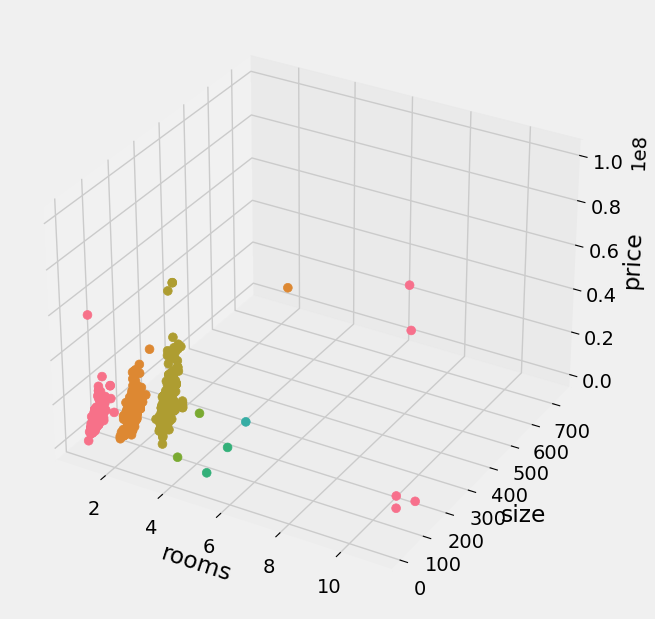

In [30]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = np.array(res['rooms'])
y = np.array(res['size'])
z = np.array(res['price'])

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('rooms')
ax.set_ylabel('size')
ax.set_zlabel('price')

# save
plt.savefig("scatter_hue", bbox_inches='tight')

/usr/local/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/min_ds-en

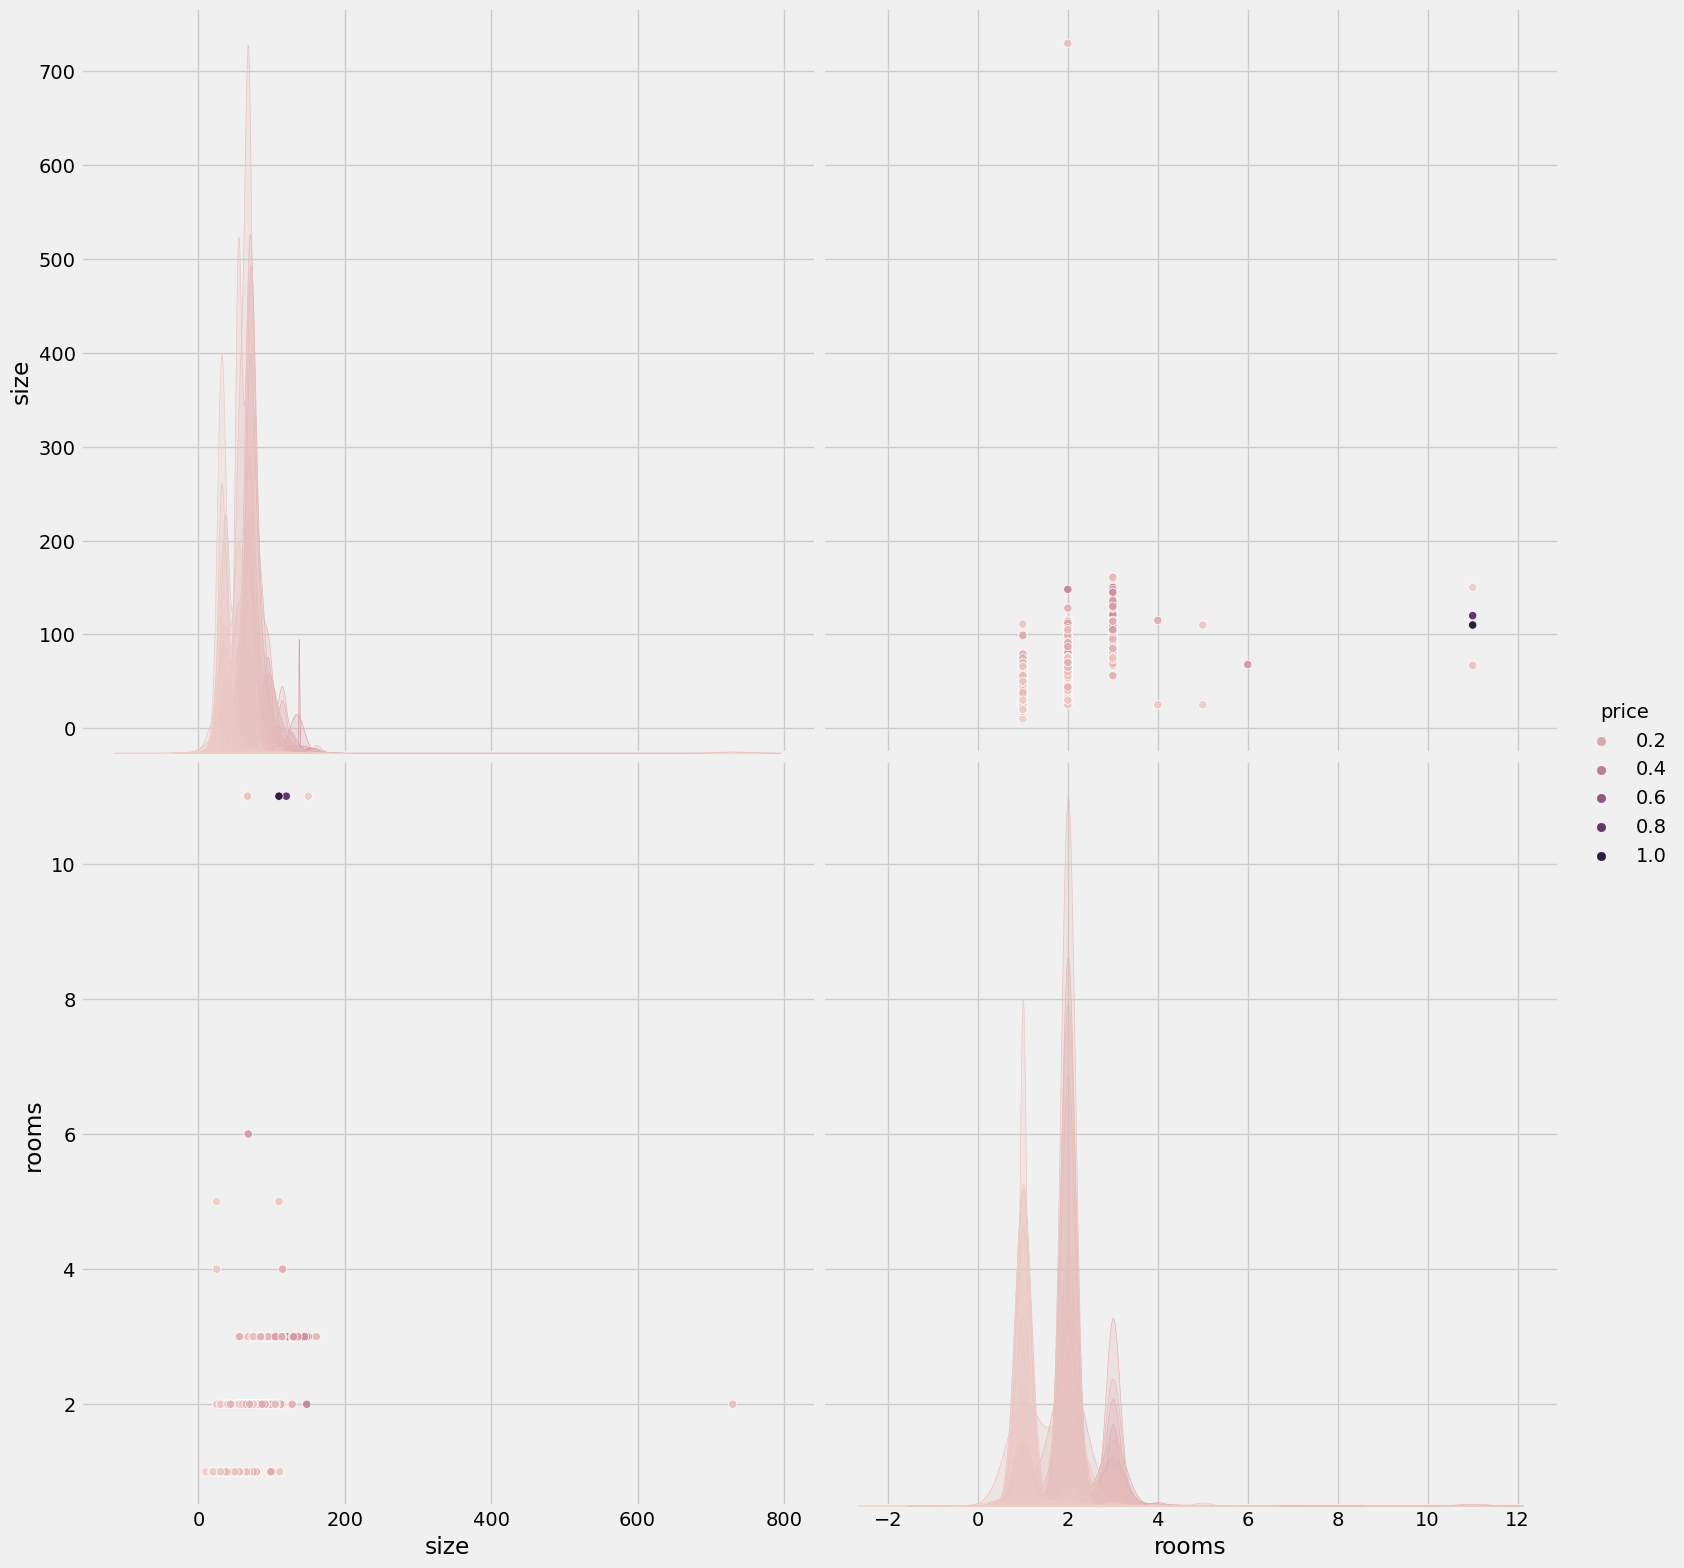

In [31]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['x'] = x
df_3d['y'] = y
df_3d['z'] = z

sns.pairplot(res, hue='price', height=8)

**Nhận xét**: Qua 2 biểu đồ cho ta thấy, nhu cầu cho thuê các phòng ở có 2 phòng và rộng khoảng 100 $m^2$ là khá lớn, do đó giá của các phòng đáp ứng điều kiện đó cũng cao so với các giá trị khác. Tiếp đó là các căn hộ có 1 phòng hoặc có kích thước khoảng 50 $m^2$ giá cũng khá cao. 

### Câu 3. Tìm một căn hộ phù hợp để thuê theo một số tiêu chí?

Ví dụ câu hỏi: Muốn tìm một căn chung cư ở Quận 3 có 2 phòng ngủ, giá phòng từ 8 triệu đến 9 triệu.

In [33]:
apartment_df[(apartment_df['price'] <= 9000000) & (apartment_df['price'] >= 7000000) & (apartment_df['area_name'] == 'Quận 3') & (apartment_df['rooms'] == 2)]

,subject,body,price,price_string,size,rooms,toilets,area_name,ward_name,street_name,deposit,longitude,latitude,apartment_type
2820,Căn hộ 2PN full nội thất giá rẻ ngay Q3 ✅✅✅,"KHAI TRƯƠNG CĂN HỘ 2PN, STUDIO CAM KẾT RẺ SIÊU...",9000000,9 triệu/tháng,70,2,1,Quận 3,Phường 10,Đường Cách Mạng Tháng Tám,0,107,11,Căn hộ dịch vụ
3905,🌈2 PHÒNG NGỦ - NAM KỲ KHỞI NGHĨA - MÁY GIẶT RIÊNG,💭 ƯU ĐÃI HỖ TRỢ KHI XEM PHÒNG VÀ CHỐT PHÒNG\n🌻...,8000000,8 triệu/tháng,65,2,1,Quận 3,Phường Võ Thị Sáu,Nam Kỳ Khởi Nghĩa,0,107,11,Căn hộ dịch vụ
5665,Nhà nguyên căn tầng trệt - chung cư Kỳ Đồng - Q.3,Cho thuê nhà nguyên căn tầng trệt đường Kỳ Đồn...,8500000,"8,5 triệu/tháng",33,2,1,Quận 3,Phường 9,Đường Kỳ Đồng,0,107,11,Chung cư
7113,2pn mới tin chưa ai ở qua giá mềm nhất sg,658 CÁCH MẠNG THÁNG TÁM- QUẬN 3 \nTrung tâ...,9000000,9 triệu/tháng,58,2,1,Quận 3,Phường 10,Cách Mạng Tháng Tám,9000000,107,11,Căn hộ dịch vụ
8361,Cho thuê lầu 1 chung cư Lý Chính Thắng,"Mặt tiền Lý Chính Thắng, có sẵn 1 phòng ngủ, p...",9000000,9 triệu/tháng,51,2,1,Quận 3,Phường Võ Thị Sáu,Đường Lý Chính Thắng,15000000,107,11,Chung cư
11938,"Căn hộ dịch vụ, mini Quận 3 45m² 2PN","Còn một căn hộ 2PN ,ban công thoáng mát, ...",8000000,8 triệu/tháng,45,2,2,Quận 3,Phường 13,Trần Quang Diệu,8000000,107,11,Căn hộ dịch vụ
13898,"CHDV 2 PN Full nội thất, Nam Kỳ Khởi Nghĩa, Q3","- Căn hộ 2 phòng ngủ, ban công, cửa sổ thoáng ...",7800000,"7,8 triệu/tháng",40,2,1,Quận 3,Phường Võ Thị Sáu,Đường Nam Kỳ Khởi Nghĩa,0,107,11,Căn hộ dịch vụ
16934,CHDV 65m2 2PN đường Nam Kỳ Khởi Nghĩa ưu đãi ...,"Cho thuê CHDV đường Nam Kỳ Khởi Nghĩa, Phường ...",7500000,"7,5 triệu/tháng",65,2,1,Quận 3,Phường Võ Thị Sáu,Nam Kỳ,5000000,107,11,Căn hộ dịch vụ


## 5. Tổng hợp lại quá trình thực hiện đồ án

### Những khó khăn

+ Thực hiện đồ án một mình
+ Do tự đặt yêu cầu cho bản thân nên tự crawl dữ liệu tốn khá nhiều thời gian, mỗi lần crawl gần 1 tiếng đồng hồ với hơn 20K request
+ Do đã đi làm nên thời gian ít và có nhiều đồ án lẫn deadline công việc cần hoàn thành

### Những kiến thức học được

+ Ôn lại kiến thức về `python`, `pandas`, `numpy`, `matplotlib`
+ Tìm hiểu thêm được kiến thức về crawl và eda dữ liệu
+ Nâng cao được khả năng viết báo cáo

### Sẽ làm gì nếu có thêm thời gian


+ Đặt ra thêm nhiều câu hỏi hơn, xử lý thêm một feature là khoảng cách tới trung tâm hay tới một hoặc vài địa điểm nào đó do có (lontitude, latitude)
+ Mô hình này hoàn toàn áp dụng lại được với giá mua bán chung cư, căn hộ nên có thể tái sử dụng chỉ cần sửa một vài thông số

## 6. Tham khảo

+ [https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)
+ [https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent)
+ Tài liệu môn học, các bài lab
+ [nhatot.vn](https://www.nhatot.com/thue-can-ho-chung-cu-tp-ho-chi-minh)
+ [stackoverflow](https://stackoverflow.com/)